In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('diabetes.csv') 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Скачайте исходный набор данных и отделите от него первые 690 строк.

Введите число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).

Отбор первых 690 строк:



In [4]:
task_data = df.head(690)

Вывод числа строк в получившейся выборке и относящихся к классу 0 (пациент не болен диабетом)



In [5]:
len(task_data[task_data['Outcome'] == 0])

453

2. Разделите полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый). Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.


Разделеные данных на тренировочные и тестовые. Первые 80% строк — тренировочные, остальные — тестовые.



In [6]:
task_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

Выделяем предикторы (8 первых столбцов) и отклик (Outcome):



In [8]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Подключем классификатор DecisionTreeClassifier:



In [9]:
#from sklearn.tree import DecisionTreeClassifier

Задаем параметры дерева принятия решений и обучаем модель:



In [10]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)


Подключаем библиотеку для визуализации дерева. Сохраняем в файл и выводим на экран.



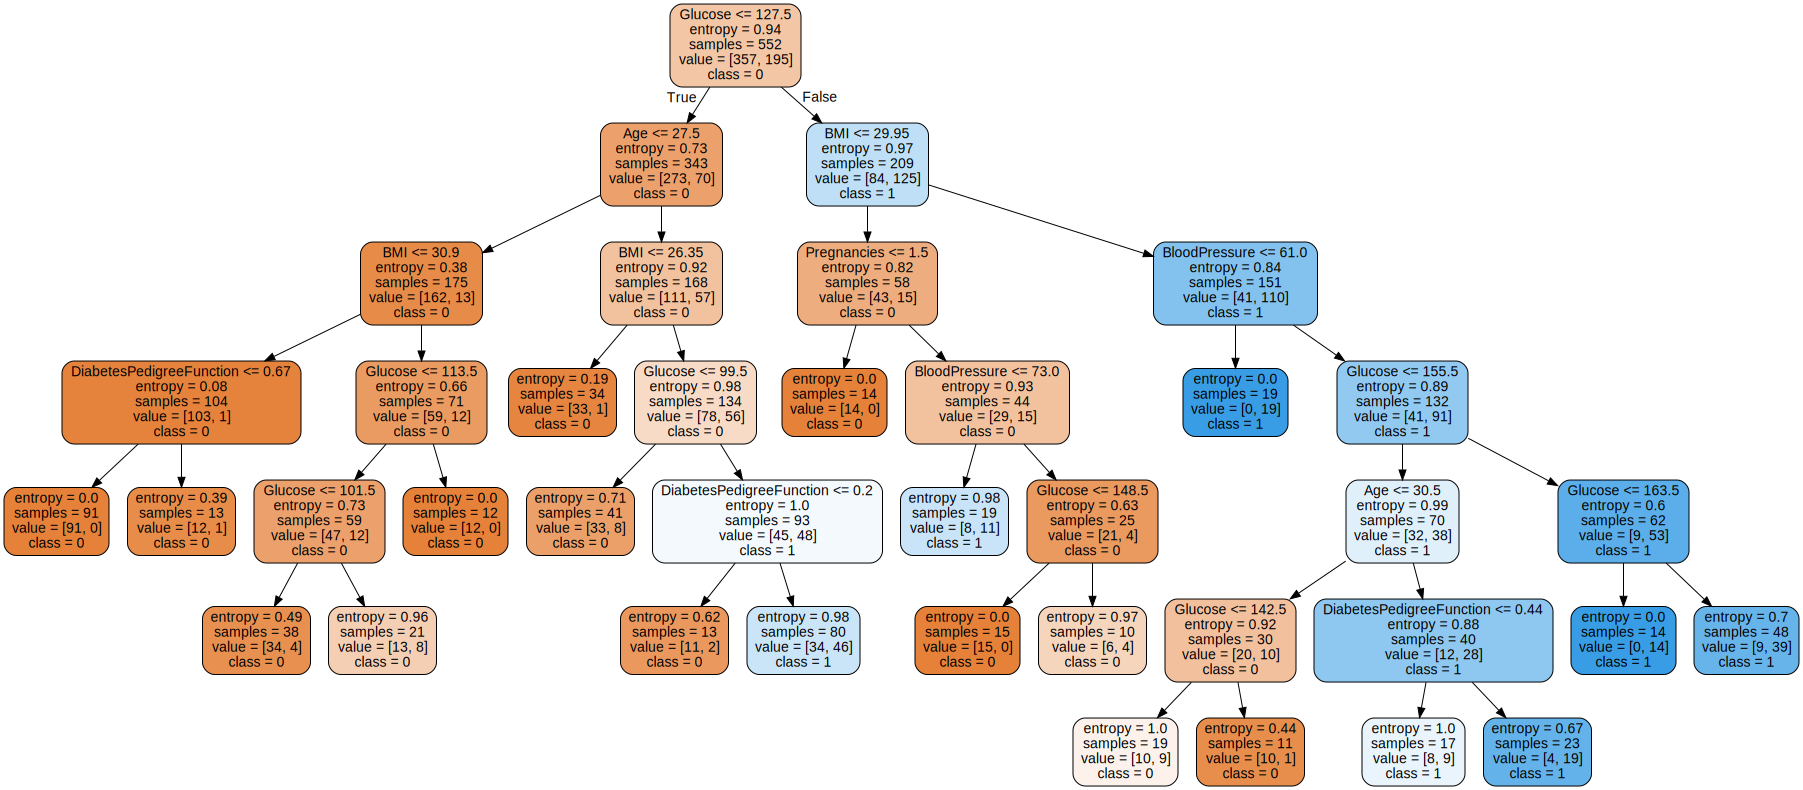

In [11]:
#from sklearn.tree import export_graphviz
#import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


Выводим глубину дерева:



In [12]:
clf.tree_.max_depth

6

Выполняем предсказание для объектов из тестовой выборки:



In [13]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

Доля правильных ответов классификатора:



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7898550724637681

Среднее значение метрик  F1  (Macro-F1):



In [15]:
#from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.7534955343393901

Выполним предсказание для конкретного объекта (с индексом 708) исходных данных:



In [16]:
df.loc[708, features]

Pregnancies                   9.000
Glucose                     164.000
BloodPressure                78.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          32.800
DiabetesPedigreeFunction      0.148
Age                          45.000
Name: 708, dtype: float64

Назначенный класс:



In [17]:
clf.predict([df.loc[708, features].tolist()])[0]

1

6. Выполните предсказание для пациентов 727, 710, 704, 729 (указаны номера строк, нумерация с нуля) из начального набора данных.



In [18]:
clf.predict([df.loc[727, features].tolist()])[0]

0

In [19]:
clf.predict([df.loc[710, features].tolist()])[0]

1

In [20]:
clf.predict([df.loc[704, features].tolist()])[0]

0

In [21]:
clf.predict([df.loc[729, features].tolist()])[0]

0